In [150]:
import pandas as pd 
import numpy as np 

import warnings 

warnings.filterwarnings('ignore')

In [151]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

In [152]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px 
import seaborn as sns 


In [153]:
df = pd.read_csv(r'demanda_dataset.csv')

In [154]:
df.rename(columns={"Unnamed: 0":"fecha"}, inplace=True)

In [155]:
df=df.set_index(df["fecha"])

In [156]:
df=df.iloc[:,1:]

In [157]:
df.rename(columns={"Unnamed: 0":"fecha"}, inplace=True)

In [158]:
df.index=pd.to_datetime(df.index)

In [159]:
df = df[['LA']]

In [160]:
df.tail()

,LA
fecha,
2023-04-30,1573.0
2023-05-31,1899.0
2023-06-30,1960.0
2023-07-31,1772.0
2023-08-31,1723.0


In [161]:
df.describe()

,LA
count,187.000000
mean,1543.588235
std,494.568745
min,668.000000
25%,1178.500000
50%,1474.000000
75%,1862.500000
max,3239.000000


In [162]:
df.dtypes

LA    float64
dtype: object

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 2008-02-29 to 2023-08-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


<function matplotlib.pyplot.show(close=None, block=None)>

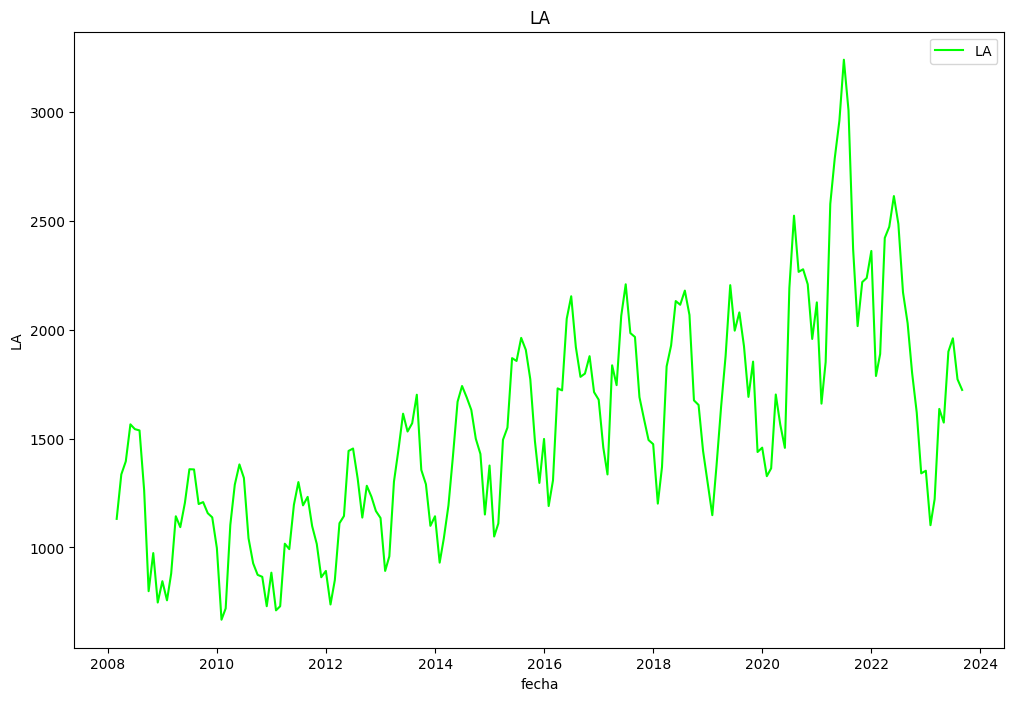

In [164]:
sns.lineplot(df, x=df.index, y=df['LA'], label='LA', color='lime' )
plt.title('LA')
plt.show

count     187.000000
mean     1543.588235
std       494.568745
min       668.000000
25%      1178.500000
50%      1474.000000
75%      1862.500000
max      3239.000000
Name: LA, dtype: float64

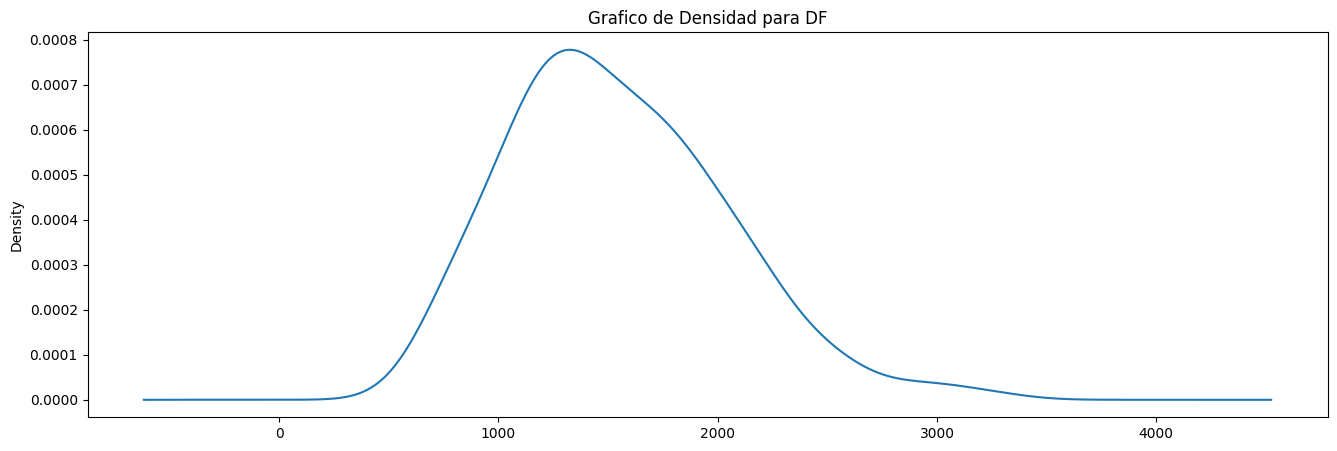

In [165]:
df['LA'].plot(kind='kde', figsize=(16,5))
plt.title('Grafico de Densidad para DF')
df['LA'].describe()

Analizando la Estacionariedad 

In [166]:
from statsmodels.tsa.stattools import adfuller

In [167]:
def augmented_dickey_fuller_test_func(series, column_name):
    print(f'resultados de la prueba de Dickey para la columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Tets statics', 'p-value', 'No Lags Used', 'numero de observaciones utilizadas'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value(%s)' %key] = value
    print(dfoutput)
    if dftest[1] <= 0.05:
        print('conclusion: =====>')
        print('rechazar la hipotesis nula')
        print('los datos son estacionarios')
    else: 
        print('conclusion: =====>')
        print('no se puede rechazar la hipotesis nula ')
        print('los datos no son estacionarios')
    

In [168]:
augmented_dickey_fuller_test_func(df['LA'],'LA')

resultados de la prueba de Dickey para la columna: LA
Tets statics                           -1.797127
p-value                                 0.381889
No Lags Used                           14.000000
numero de observaciones utilizadas    172.000000
Critical Value(1%)                     -3.468952
Critical Value(5%)                     -2.878495
Critical Value(10%)                    -2.575809
dtype: float64
conclusion: =====>
no se puede rechazar la hipotesis nula 
los datos no son estacionarios


In [169]:
from scipy.stats import  boxcox
transformed, lam = boxcox(df['LA'])
print(lam)
df['box']=transformed

0.2213274274881098


In [170]:
df['log']=np.log(df['LA'])

Text(0.5, 1.0, 'Grafico de Densidad para DF')

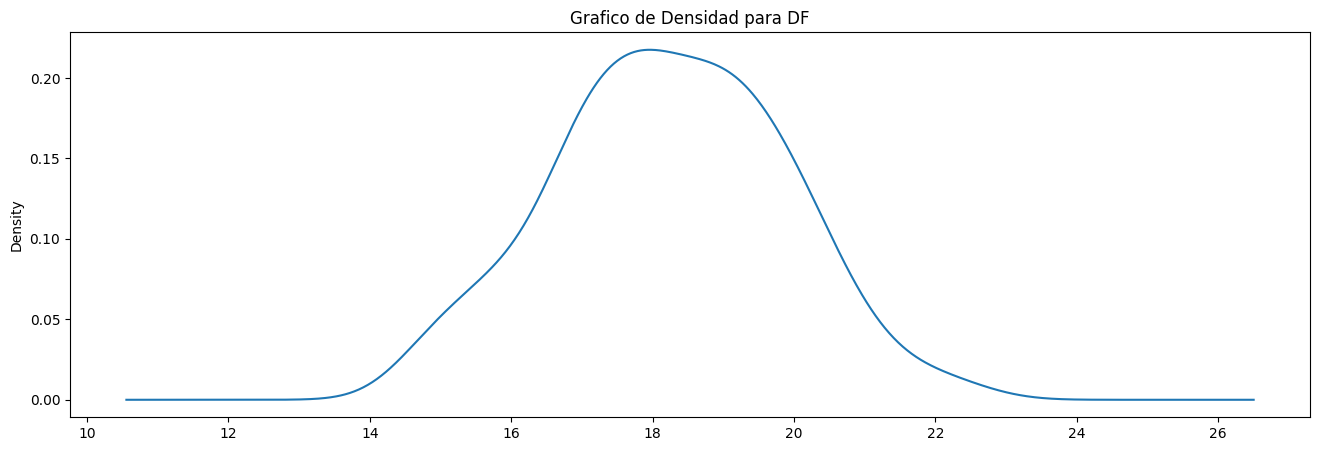

In [171]:
df['box'].plot(kind='kde',figsize = (16,5))
plt.title('Grafico de Densidad para DF')

Text(0.5, 1.0, 'Grafico con transformacion Box-Cox')

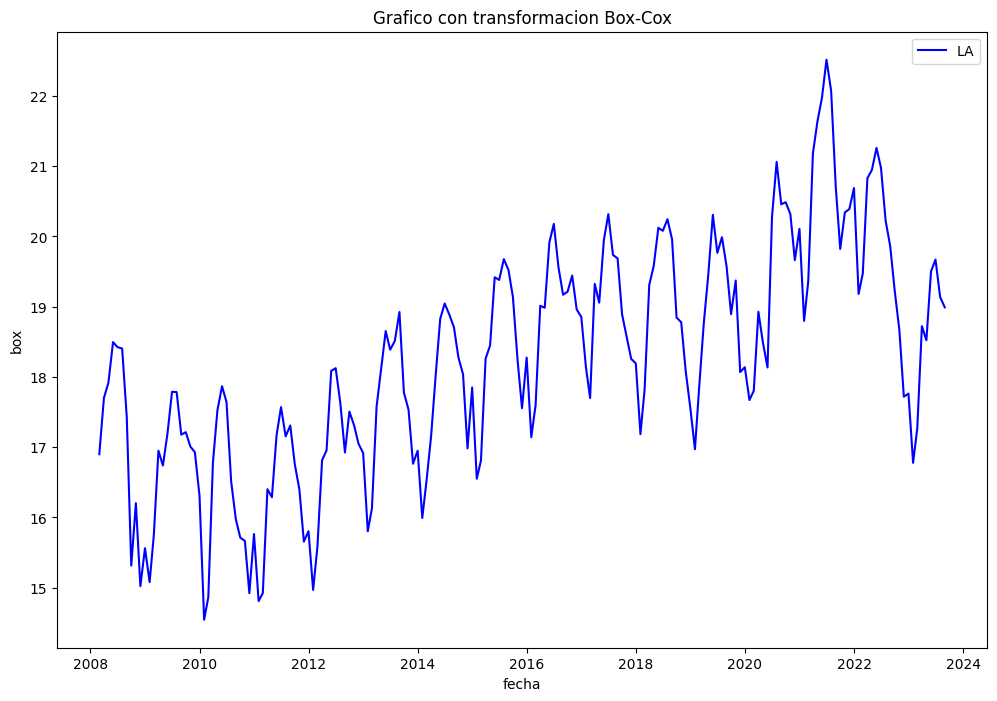

In [172]:
sns.lineplot(data=df, x=df.index, y=df['box'], label='LA', color='blue')
plt.title('Grafico con transformacion Box-Cox')


In [173]:
from statsmodels.tsa.seasonal import seasonal_decompose


Text(0.5, 1.0, 'Grafico con transformacion Box-Cox')

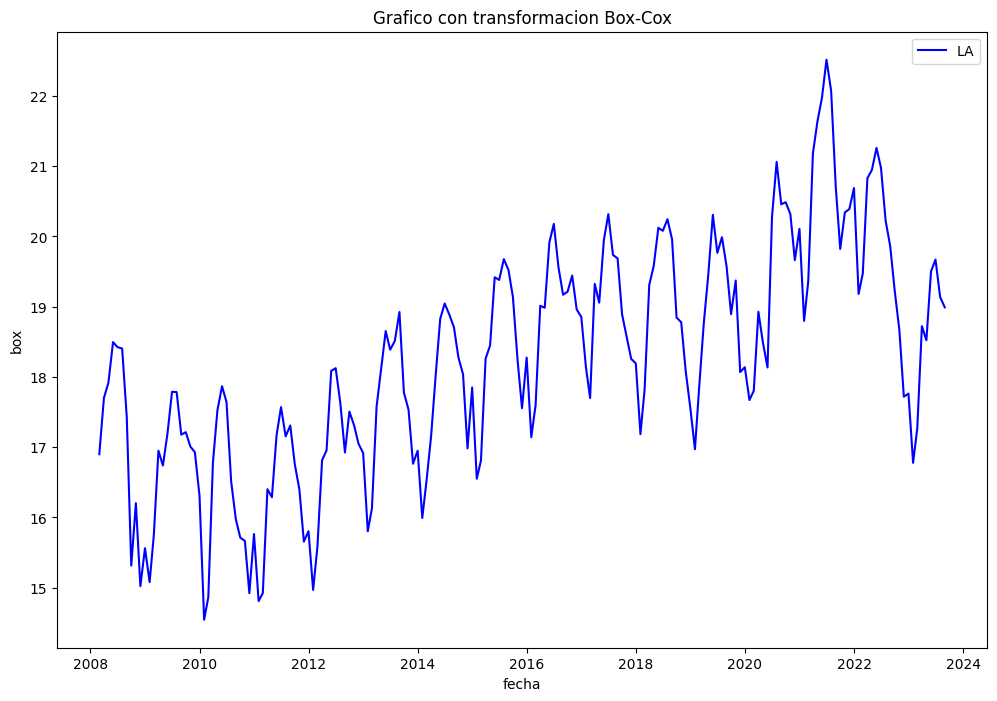

In [174]:
sns.lineplot(data=df, x=df.index, y=df['box'], label='LA', color='blue')
plt.title('Grafico con transformacion Box-Cox')

  

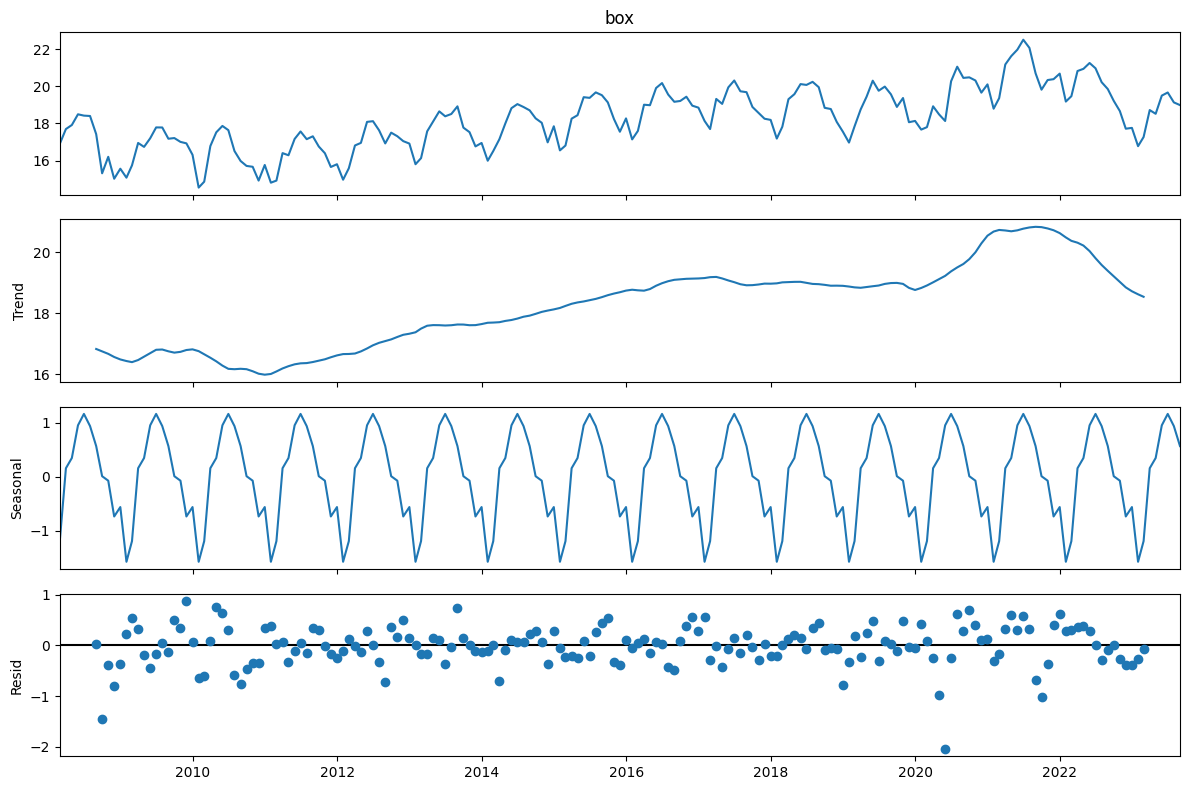

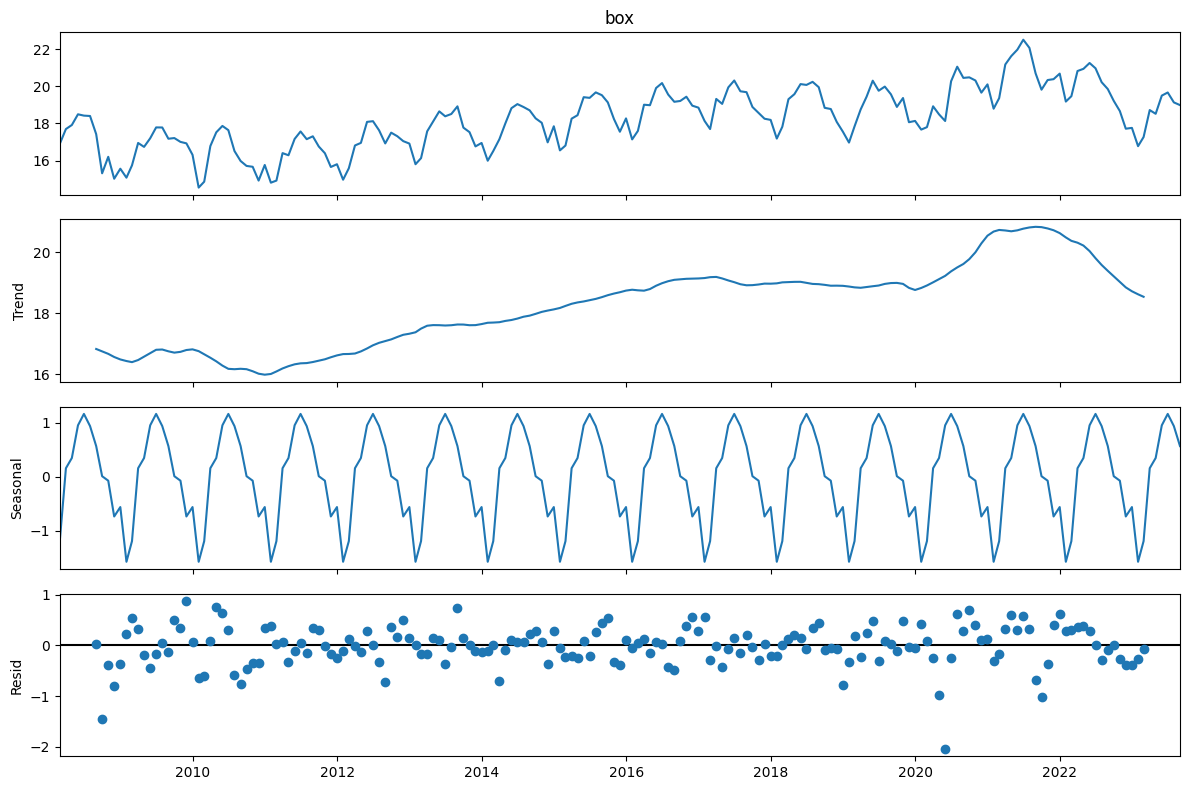

In [175]:
plt.rcParams['figure.figsize'] = (12,8)
a = seasonal_decompose(df['box'], model= 'add', period=12) 
a.plot()

In [176]:
df.head()

,LA,box,log
fecha,,,
2008-02-29,1131.0,16.899850,7.030857
2008-03-31,1335.0,17.700550,7.196687
2008-04-30,1395.0,17.917800,7.240650
2008-05-31,1565.0,18.496141,7.355641
2008-06-30,1543.0,18.424141,7.341484


In [177]:
df = df.copy()
df = df[['LA']]

In [178]:
print(df.shape)

(187, 1)


In [179]:
df.reset_index(inplace=True)

In [180]:
df.head(1)

,fecha,LA
0,2008-02-29,1131.0


In [181]:
df['unique_id']='1'
df.columns=['ds','y','unique_id']

In [182]:
df

,ds,y,unique_id
0,2008-02-29,1131.0,1
1,2008-03-31,1335.0,1
2,2008-04-30,1395.0,1
3,2008-05-31,1565.0,1
4,2008-06-30,1543.0,1
...,...,...,...
182,2023-04-30,1573.0,1
183,2023-05-31,1899.0,1
184,2023-06-30,1960.0,1
185,2023-07-31,1772.0,1


In [200]:
from mlforecast import MLForecast as ML

In [ ]:
import numpy as np

def transform_data(data):
  """
  Transforma los datos para mejorar la precisión de los pronósticos.

  Args:
    data: Un array de numpy que contiene los datos.

  Returns:
    Un array de numpy que contiene los datos transformados.
  """

  # Calcula las diferencias de las series temporales.
  diff = np.diff(data)

  # Devuelve los datos transformados.
  return diff

# Transforma los datos.
transformed_data = transform_data(data)

# Crea un modelo de pronóstico.
fcst = MLForecast(models=[])

# Entrena el modelo con los datos transformados.
fcst.fit(transformed_data)

# Genera predicciones.
predictions = fcst.predict(12)

In [207]:
fcst = ML(
    models=[],
    freq= 12,
    lags=[1]
)

In [208]:
prep = fcst.preprocess(df, time_col= 'ds',
                       target_col='y',
                       id_col = 'unique_id')
prep

,ds,y,unique_id,lag1
1,2008-03-31,1335.0,1,1131.0
2,2008-04-30,1395.0,1,1335.0
3,2008-05-31,1565.0,1,1395.0
4,2008-06-30,1543.0,1,1565.0
5,2008-07-31,1537.0,1,1543.0
...,...,...,...,...
182,2023-04-30,1573.0,1,1636.0
183,2023-05-31,1899.0,1,1573.0
184,2023-06-30,1960.0,1,1899.0
185,2023-07-31,1772.0,1,1960.0


Text(0.5, 1.0, 'grafico con transformacion')

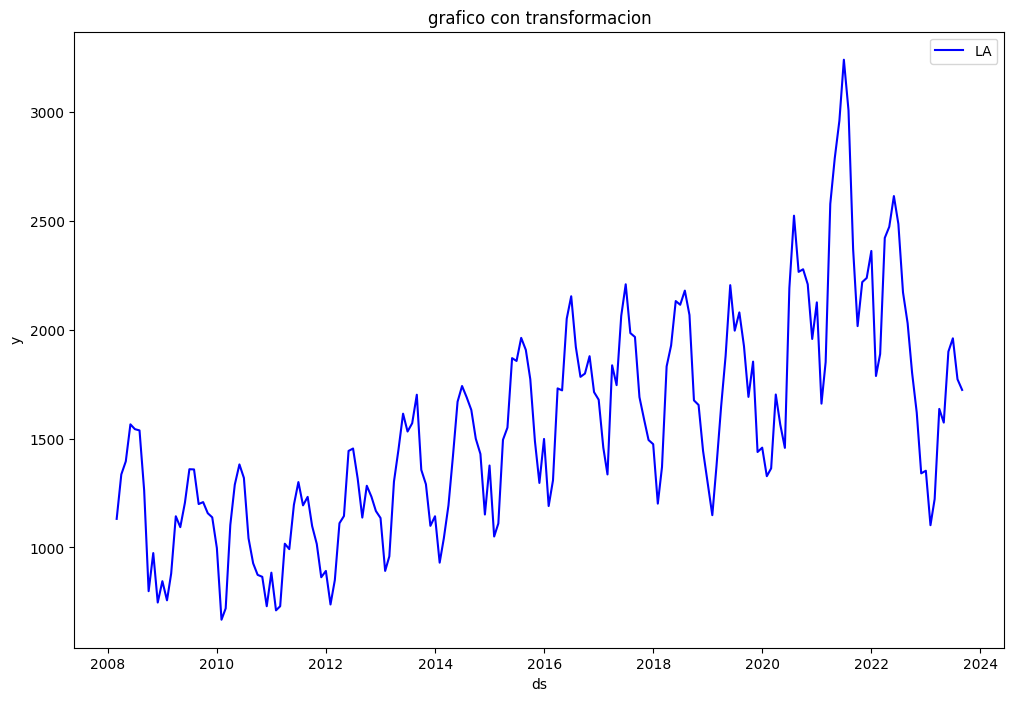

In [194]:
sns.lineplot(data=prep, x='ds', y='y', label='LA', color='blue')
plt.title('grafico con transformacion')